# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [48]:
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats 
import numpy as np 
import statsmodels.formula.api as smf

df = pd.read_csv('data/human_body_temperature.csv')

## 1. Is the distribution of body temperatures normal? 

In this section, I check to see if the distribution of human body temperatures in the given dataset is normal. In the first section, I create a histogram of the temperature data. This does not really give us a lot of information on which to judge the normality of the data. Therefore, I also graph a normal probability plot. This plot plots the original data against the quantiles of the normal distribution. A line of fit is drawn and the correlation between the two sets of data is calculated. 

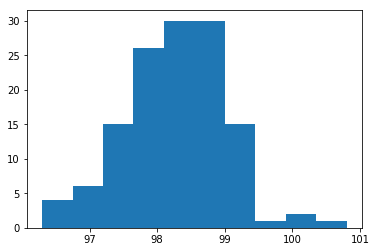

In [12]:
plt.hist("temperature", data=df) 
plt.show() 

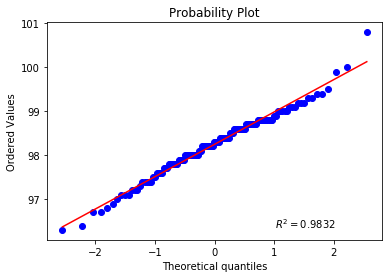

In [23]:
temp = df["temperature"]
stats.probplot(temp, fit = True, plot=plt, rvalue=True)
plt.show() 

In this case, the normal probability plot looks pretty good. The R^2 value is 0.98, which means that the theoretical 
quantiles of the normal distribution and the temperature data are very positively correlated. This suggests that the 
distribution of temperature data is indeed normally distributed. 

## 2. Is the sample size large? Are the observations independent? 
To determine if the sample size is large, we need to figure out the length or number of rows that are contained in the dataset. To know if the observations are independent, we need to know the data generating process, or how the data was created and / or collected. 

In [26]:
len(temp)

130

There are 130 temperature observations that are contained in the dataset. Since this is over 30, we can assume that the data approximates the normal distribution and can apply our statistical tests. 

There is not enough information in the accompanying files to tell how the data was collected. Therefore, I will assume that each row of observations is from a separate person and therefore, independent. 

## Is the true population mean really 98.6 degrees F?
To find out if the true population mean is really 98.6F, I will first conduct a bootstrapped hypothesis test. The null hypothesis is that the true population mean is 98.6F. The alternative hypothesis is that the sample mean is not equal to 98.6F. 

First, I'll define a function that bootstraps replications. Then, I will use this function on the data and compute the p-value of the bootstrap hypothesis test. 

In [37]:
def draw_bootstrap(data, func, size=1):

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

data_mean = np.mean(temp) # the mean of the data is 98.2492
data_mean

98.24923076923078

In [63]:
bs_replicates = draw_bootstrap(temp, np.mean, 100)
p = np.sum(bs_replicates <= data_mean) / 1000
print('p =', p) 

p = 0.04


Using the bootstrap hypothesis test, we see that the p-value is 0.04. Since the p-value is p < 0.05, we reject the null hypothesis. There is evidence to suggest that the true population mean is different than 98.6F. 

Now, I will use a one-sample test to confirm these results. A one sample test is appropriate here because we do not have two samples of data, nor two groups to compare. We are pooling all of the data into one vector. Therefore, the only appropriate method in this case is a one-sample test. We can use either a t-test or a z-test because the data is normally distributed and the number of observations is > 30. However, a Z-test is the most appropriate since the data follows a normal distribution. 

In [60]:
z_stat = (data_mean - 98.6) / (np.std(temp)/np.sqrt(130)) 
print('The z-statistic is', z_stat)
p_value = stats.norm.cdf(z_stat) * 2
print('The p-value for this test is', p_value)

The z-statistic is -5.475925202078116
The p-value for this test is 4.3523151658821886e-08


The p-value for the one-sample z test is p < 0.00. Therefore, we reject the null hypothesis that the true population mean is 98.6F. There is enough evidence to suggest that the true population mean is *not* 98.6F. 

To compare, I now program a one-sample t-test. 

In [41]:
stats.ttest_1samp(temp, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In this case, the one-sample t-test t-statistic is -5.4548, which has a p-value of p < 0.00. This means that we reject the null hypothesis that the true population mean is 98.6F. There is enough evidence to suggest that the true population mean is *not* 98.6F. 

Because, as put forth earlier, the sample size is > 30 and the data approximates the normal distribution, both the one-sample z-test and the one-sample t-test come to the same conclusion: there is enough evidence to suggest that the true population mean temperature is *not* 98.6F. 

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 
In this case, since the number of observations is 10 and 10 < 30, the one-sample t-test is appropriate instead of the 
one-sample z-test. 

In [71]:
temp_sample = temp.sample(10, replace=False, weights=None, random_state=99, axis=None)

In [72]:
# one-sample z-test 
z_stat = (np.mean(temp_sample) - 98.6) / (np.std(temp_sample)/np.sqrt(10)) 
print('The z-statistic is', z_stat)
p_value = stats.norm.cdf(z_stat) * 2
print('The p-value for this test is', p_value)

The z-statistic is -1.405097528793156
The p-value for this test is 0.15999227886797007


For the one-sample z-test, the p-value is p > 0.05. This means that we fail to reject the null hypothesis that the true population mean temperature is 98.6F. 

In [73]:
# one-sample t-test
stats.ttest_1samp(temp_sample, 98.6) 

Ttest_1sampResult(statistic=-1.3329925576980448, pvalue=0.21529166546054299)

For the one-sample t-test, the p-value is p > 0.05. Therefore, we fail to reject the null hypothesis that the true population mean temperature is 98.6F. 

There is not much difference between the conclusions of these two tests -- they both fail to reject the null hypothesis. This is the case because although the sample only contains 10 observations, the data it is drawn from approximates the normal distribution. If this was not the case, the t-test would be the only test to yield accurate conclusions, since the t-test does not rely on the assumption of normality. 

## 5. At what temperature should we consider someone's temperature to be "abnormal"? 


In [110]:
# using the bootstrap method
# margin of error
moe = 1.96 * (np.std(bs_replicates)/np.sqrt(130)) 
print('The margin of error is', moe) 
              
# Compute the 95% confidence interval 
ci = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', ci, 'F')

The margin of error is 0.011158980605096623
95% confidence interval = [98.10880769 98.36169231] F


Using the bootstrap method, anything outside this range is more than two standard deviations away from the mean and should thus be considered abnormal. 98.6 is outside of this range and should thus *be considered* abnormal. 

In [115]:
# using the one-sample z-test method
moe = 1.96 * (np.std(temp)/np.sqrt(130)) 
print('The margin of error is', moe) 

# Compute the 95% confidence interval 
ci_low = np.mean(temp) - moe
ci_high = np.mean(temp) + moe 

# Print the confidence interval
print('95% confidence interval is: [', ci_low, ',', ci_high, ']') 

The margin of error is 0.125550964802579
95% confidence interval is: [ 98.12367980442819 , 98.37478173403336 ]


Using the critical z-statistic, anything outside of the above range is more than two standard deviations away from the mean and should thus be considered abnormal. 98.6F is not within this range and *should* be considered abnormal according to the normal distribution.  

In [118]:
# Using the one-sample t-test method
moe_t = stats.t.ppf(0.95, len(temp) - 1) * (np.std(temp)/np.sqrt(130)) 
print('The margin of error is', moe_t) 

ci_low = np.mean(temp) - moe_t
ci_high = np.mean(temp) + moe_t 

# Print the confidence interval
print('95% confidence interval is: [', ci_low, ',', ci_high, ']') 

The margin of error is 0.10612589850098342
95% confidence interval is: [ 98.1431048707298 , 98.35535666773175 ]


Using the critical t-statistic, anything outside of the above range is more than two standard deviations away from the mean and should thus be considered abnormal. 98.6F is not within this range and *should* be considered abnormal according to the Student's t distribution. 

## 6. Is there a significant difference between males and females in normal temperature?
In this case, we need to split the sample of temperature observations into two groups: males and females. Because each observation is independent, we now have two independent groups. 

In [97]:
# males
males = df[df.gender == "M"] 
males = males["temperature"]
n_males = len(males) # 65

# females
females = df[df.gender == "F"] 
females = females["temperature"]
n_females = len(females) # 65 

Because both n are > 30, we could use either a two-sample z-test or a two-sample t-test. Because the two-sample t-test does not rely on the assumption of normality and we have cut the number of observations in half, I will use the two-sample t-test to determine if there is a significant difference between the normal temperature in males and females. In addition, I will not assume that the variance of the observations is the same for both groups. Therefore, I use a Welch's t-test. 

*Null hypothesis*: There is no difference between the average normal temperature in males and females. 

*Alternative hypothesis*: The average normal temperature in males is not equal to the average normal temperature in males. 

In [98]:
stats.ttest_ind(males, females, axis=0, equal_var=False) 

Ttest_indResult(statistic=-2.285434538165611, pvalue=0.023938264182934196)

From this Welch's t-test, the p-value is p = 0.02. Since p < 0.05, we can reject the null hypothesis that there is no difference in average temperature between males and females. There is enough evidence to suggest that there is a significant difference in the average normal temperature of males and the average normal temperature of females. 

Based on the calculation of the t-statistic, it seems to point in the direction of females having a higher average temperature than males. This is because the calculation is males - females, so a negative t-statistic means that females have a higher temperature on average than males. 